# Assignment 1

Probability, Linear Algebra, and Computational Programming

Pranshul Bhatnagar    
Pb251

## Exercise 1 - Probabilistic Reasoning

**1.1. Probabilistic Reasoning I.** You are handed three fair dice and
roll them sequentially. What’s the probability of the sum of the dice is
10 after you’ve rolled the first die and it shows a 1?

<span style="color:#980404;">
<b>Answer:</b>
</span> 

We are given three fair dice and the first die shows a 1. We need the probability that the sum of all three dice equals 10. 
Since the first die is 1, the remaining two dice need to sum to (10 - 1 = 9). 
The possible pairs for two dice that sum to 9 are: (3,6), (4,5), (5,4), and (6,3). That makes 4 favorable outcomes. The total outcomes for the two dice are (6X6 = 36). 

$$
    P(\text{sum} = 10 \mid \text{first die} = 1) = \frac{4}{36} = \frac{1}{9} \approx 0.111
$$



**1.2. Probabilistic Computation I.** Simulate the scenario in 1.1 by
creating 1 million synthetic rolls of the three dice. Determine what
fraction of outcomes that had a “1” for the first die also had a sum of
10 across the three die.

<span style="color:#980404;">
<b>Answer:</b>
</span> 

To simulate this, I created 1,000,000 rolls of three dice using Python and then counted how many times the first die was 1 and the sum of all three dice was 10.

In [ ]:
import numpy as np
rolls = np.random.randint(1, 7, size=(1000000, 3))

# count how many rolls have first die as 1 and sum as 10
count= np.sum((rolls[:, 0] == 1) & (np.sum(rolls, axis=1) == 10))

# Fraction of such rolls
result = count / 1000000
print(result)

After running the above simulation, the fraction came out to be approximately  **0.11**, which matches the theoretical probability from part 1.1. And also, by the **law of large numbers**, the empirical fraction should converge to the true possibility computed in 1.1

**1.3. Probabilistic Reasoning II.** A test for a rare disease has a 95%
chance of detecting the disease if a person has it (true positive rate)
and a 3% chance of wrongly detecting it if a person does **not** have it
(false positive rate). If 1 in 1,000 people *actually* have the disease,
what is the probability that a randomly chosen person who tests positive
actually has the disease?

<span style="color:#980404;">
<b>Answer:</b>
</span>  


We are asked to find the probability that a person actually has a rare disease given that they tested positive.
$$
    True positive rate = 95\% → P(Positive \mid Disease) = 0.95 \\
    False positive rate = 3\% → P(Positive \mid No Disease) = 0.03 \\
    Prevalence of disease = 1 in 1000 → P(Disease) = 0.001 \\
$$

**Bayes' Theorem**
$$
P(\text{Disease} \mid \text{Positive}) = 
    \frac{P(\text{Positive} \mid \text{Disease}) \cdot P(\text{Disease})}
    {P(\text{Positive} \mid \text{Disease}) \cdot P(\text{Disease}) 
    + P(\text{Positive} \mid \text{No Disease}) \cdot P(\text{No Disease})}\\
    \\
$$

**Using Bayes' rule, the probability that a person actually has the disease given a positive test is:** 

$$
\frac{(1/1000)\times 0.95}{(1/1000)\times 0.95 + (999/1000)\times 0.03}
= \frac{0.00095}{0.03092}
\approx 0.031.
$$

Thus, only about **3.1%** of individuals who test positive actually have the disease.


**1.4. Discrete Probability Theory.** A discrete random variable $X$ is
distributed as follows (probability mass function):

$P(X = x) = \begin{cases}
                0.2 & x = -1 \\
                0.5 & x = 0 \\
                0.3 & x = 1
            \end{cases}$

What is the expected value, $E_X[X]$ and variance, $Var_X(X)$ of the
random variable $X$?

<span style="color:#980404;">
<b>Answer:</b>
</span>  <br>


The expected value of \(X\) is


$$
\mathbb{E}[X] = (-1)(0.2) + 0(0.5) + 1(0.3) = 0.1.
$$

The variance of \(X\) is computed using


$$
\mathrm{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2.
$$

We first compute


$$
\mathbb{E}[X^2] = (-1)^2(0.2) + 0^2(0.5) + 1^2(0.3) = 0.5.
$$

Therefore,


$$
\mathrm{Var}(X) = 0.5 - (0.1)^2 = 0.49.
$$

## Exercise 2 - Probability Distributions and Modeling

### Reviewing our wait time data

**2.1. Load and plot a histogram of your wait time data.** The file is
`wait_times.csv` in the `data/a1` folder [here on
Github](https://github.com/kylebradbury/ids705/tree/main/notebooks/data/a1).
I recommend using the simple `np.loadtxt()` function to accomplish this
so you can quickly load it in as a numpy array. Remember, the value 1
represents a full 8 hour work day so you should see your data are all in
the range of $[0,1]$. Please use 10 bins and limit the bin edges to the
range $[0,1]$ (no values should be plotted outside that range).

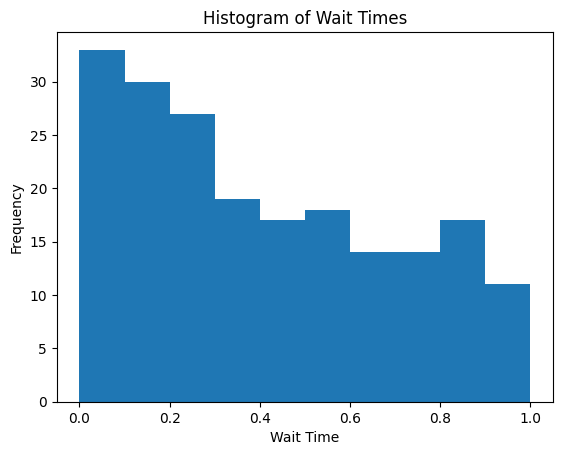

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
wt = np.loadtxt(
    "https://raw.githubusercontent.com/kylebradbury/ids705/refs/heads/main/notebooks/data/a1/wait_times.csv"
)

# plot histogram
plt.hist(wt, bins=10, range=(0, 1))
plt.xlabel("Wait Time")
plt.ylabel("Frequency")
plt.title("Histogram of Wait Times")
plt.show()

**2.2. Mean, variance, and standard deviation of the data.** Compute the
mean, variance, and standard deviation of the wait time data. Report the
mean and standard deviation in both the original units (in $[0,1]$) and
in hours (the variance is unitless).

In [2]:
# In original units
avg = np.mean(wt)
var = np.var(wt)
std = np.std(wt)
print(
    f"In original units, the mean of the data is {avg:.3f}, the variance of the data is {var:.3f}, and the standard deviation of the data is {std:.3f}."
)

# In hours
avg_hours = avg * 8
std_hours = std * 8
print(
    f"In hours, the mean of the data is {avg_hours:.3f} and the standard deviation of the data is {std_hours:.3f}."
)

In original units, the mean of the data is 0.404, the variance of the data is 0.082, and the standard deviation of the data is 0.286.
In hours, the mean of the data is 3.234 and the standard deviation of the data is 2.285.


### Creating a model for the wait time distribution

Take a moment to review the distribution of the data. The most common
distribution is normal, but this doesn’t seem normally distributed.
Neither does it look uniform. The shape actually looks like it may be
exponentially distributed, but truncated at 1. It’s not uncommon to have
this type of shape in a wait time model, but this introduces a challenge
since we can’t just use the standard exponential distribution since an
exponential distribution is defined on a domain from 0 to infinity, but
our data is defined between 0 and 1. Let’s create a customized
distribution as a model for our data and see how well it represents the
key statistics of our data.

In this section, please note the list of equations and identities at the
end of this document as they may be useful for several questions.

**2.3. Probability Density Functions (PDFs).** Compute the value of
$\alpha$ that makes $f_X(x)$ a valid probability density function:

$f_X(x) = \begin{cases}
                \alpha e^{-x}  & 0 \leq x \leq 1 \\
                0           & \text{else}
            \end{cases}$

Provide this value exactly (with no approximation) and also provide and
approximate decimal value with a precision to three decimal places.

<span style="color:#980404;">
<b>Answer:</b>
</span> <br>

To be a valid probability density function, we require

$$
\int_0^1 \alpha e^{-x}\,dx = 1.
$$

Evaluating the integral,

$$
\int_0^1 \alpha e^{-x}\,dx
= \alpha\left[-e^{-x}\right]_0^1
= \alpha(1-e^{-1}).
$$

Thus,

$$
\alpha(1-e^{-1}) = 1
\quad\Rightarrow\quad
\alpha = \frac{1}{1-e^{-1}} \approx 1.582.
$$

</span>

**2.4. Cumulative Distribution Functions (CDFs).** Compute the
cumulative distribution function (CDF) of $X$, $F_X(x)$, where
$F_X(x)=P(X<x)$ (here, $P(\cdot)$ represents the probability of the
event within the brackets). Be sure to indicate the value of the CDF for
***all*** values of $x\in(-\infty,\infty)$. Express your CDF using the
variable $\alpha$ to provide the precise CDF.

<span style="color:#980404;">
<b>Answer:</b>
</span> 

The cumulative distribution function is given by
$$
F_X(x) =
\begin{cases}
0, & x < 0, \\
\alpha(1-e^{-x}), & 0 \le x \le 1, \\
1, & x > 1,
\end{cases}
$$
where $\alpha = \dfrac{1}{1-e^{-1}}$.
</span>

**2.5. Expected Value.** Compute the expected value of $X$, $E_X[X]$.
Provide this value exactly (no approximations and only in terms of $e$
and $\alpha$) and provide a numerical approximation of the expected
value to 3 decimal places. Also provide the approximate number of hours
waiting (to 3 decimal places).


<span style="color:#980404;">
<b>Answer:</b>
</span> 

Since $( f_X(x) = \alpha e^{-x} $) for $( 0 \le x \le 1 $),

$$
\mathbb{E}[X]
= \int_0^1 x \alpha e^{-x}\,dx
= \alpha \int_0^1 x e^{-x}\,dx.
$$

Using the identity $( \int x e^{-x}dx = -e^{-x}(x+1) $),

$$
\int_0^1 x e^{-x}\,dx
= \Big[-e^{-x}(x+1)\Big]_0^1
= 1 - \frac{2}{e}.
$$

Therefore,

$$
\mathbb{E}[X] = \alpha\left(1 - \frac{2}{e}\right)
\approx 0.418,
$$

which corresponds to approximately

$$
8\,\mathbb{E}[X] \approx 3.344 \text{ hours}.
$$


**2.6. Variance and Standard Deviation.** Compute the variance of $X$,
$Var(X)$ approximately to 3 significant figures, meaning 3 digits
without leading zeros (e.g. 12.3, 0.123, 0.00123, all have 3 significant
figures). Using the variance, calculate the standard deviation and
express this standard deviation in both the original units and units of
hours.

<span style="color:#980404;">
<b>Answer:</b>
</span> 
<br>

We use
$$
\mathrm{Var}(X)=\mathbb{E}[X^2]-(\mathbb{E}[X])^2,\qquad
\mathrm{SD}(X)=\sqrt{\mathrm{Var}(X)}.
$$

Since $(f_X(x)=\alpha e^{-x}$) on $(0\le x\le 1$),
$$
\mathbb{E}[X^2]=\int_0^1 x^2 \alpha e^{-x}\,dx
=\alpha\int_0^1 x^2 e^{-x}\,dx.
$$

Using $(\int x^2 e^{-x}dx = -e^{-x}(x^2+2x+2)$),
$$
\int_0^1 x^2 e^{-x}\,dx
=\Big[-e^{-x}(x^2+2x+2)\Big]_0^1
=2-\frac{5}{e}.
$$
Thus,
$$
\mathbb{E}[X^2]=\alpha\left(2-\frac{5}{e}\right).
$$

With $(\mathbb{E}[X]=\alpha(1-2/e)$),
$$
\mathrm{Var}(X)=\alpha\left(2-\frac{5}{e}\right)-\left[\alpha\left(1-\frac{2}{e}\right)\right]^2
\approx 0.0797.
$$

Therefore,
$$
\mathrm{SD}(X)=\sqrt{\mathrm{Var}(X)}\approx 0.282,
$$
and in hours,
$$
8\,\mathrm{SD}(X)\approx 2.26\ \text{hours}.
$$


**2.7. Plotting your functions.** Create functions to implement your
PDF, $f_X(x)$, and CDF, $F_X(x)$, for all possible values of $x$. Using
these functions, plot the PDF and CDF on the inverval
$-0.5 \leq x \leq 1.5$.

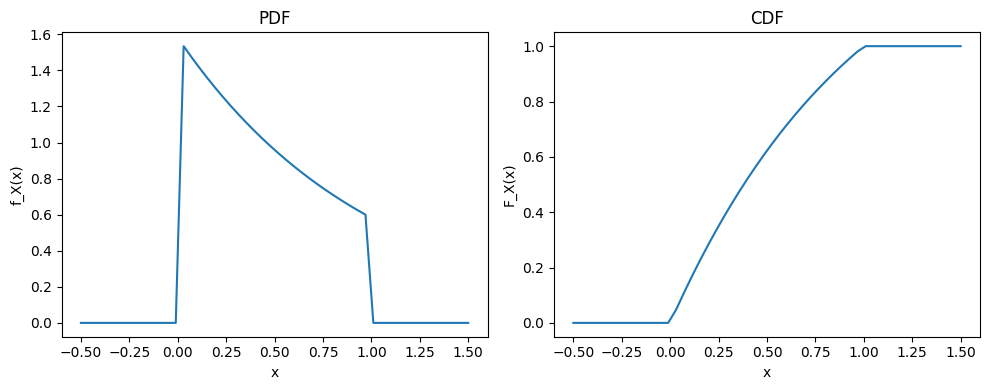

In [3]:
# prepare basic function
alpha = 1 / (1 - np.exp(-1))


def pdf(x):
    return np.where((x >= 0) & (x <= 1), alpha * np.exp(-x), 0.0)


def cdf(x):
    return np.where(x < 0, 0.0, np.where(x <= 1, alpha * (1 - np.exp(-x)), 1.0))


# plot
x = np.linspace(-0.5, 1.5)
plt.figure(figsize=(10, 4))

# pdf
plt.subplot(1, 2, 1)
plt.plot(x, pdf(x))
plt.title("PDF")
plt.xlabel("x")
plt.ylabel("f_X(x)")

# cdf
plt.subplot(1, 2, 2)
plt.plot(x, cdf(x))
plt.title("CDF")
plt.xlabel("x")
plt.ylabel("F_X(x)")

plt.tight_layout()
plt.show()

### Evaluating the quality of the model

**2.8. Compare the empirical CDF to the modeled CDF.** Plot both of
these on the interval $0 \leq x \leq 1$. For the empirical CDF of the
data from `wait_times.csv`, you can plot the empirical CDF by sorting
the data in ascending order, your $x$ values, and assigning the $y$
value as the cumulative fraction of samples that are smaller than or
equal to each $x$ value.

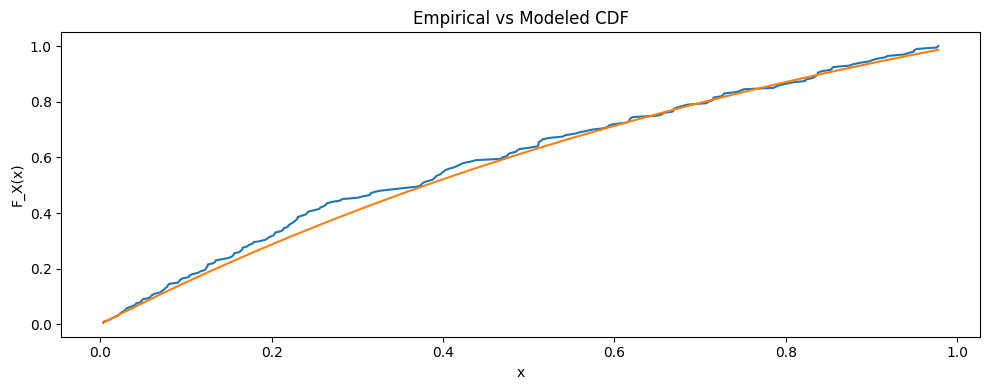

In [4]:
# sort data (x-values)
x_sorted = np.sort(wt)
n = len(x_sorted)

# empirical CDF (y-values)
y_emp = np.arange(1, n + 1) / n

# modeled CDF (y-values)
y_model = cdf(x_sorted)

# plot
plt.figure(figsize=(10, 4))
plt.plot(x_sorted, y_emp, label="Empirical CDF")
plt.plot(x_sorted, y_model, label="Modeled CDF")
plt.title("Empirical vs Modeled CDF")
plt.xlabel("x")
plt.ylabel("F_X(x)")
plt.tight_layout()
plt.show()

**2.9. Calculate the inverse CDF to enable you to generate synthetic
data.** Create a numerical simulation of this process. Doing this for a
custom PDF is easier than you may think. We typically have access to
uniformly distributed samples (through `np.random.rand`), and we can
transform these uniform samples into any distribution we wish. To do
this, we can input uniform variates through the *inverse* of the CDF. If
$U$ is a uniformly distributed random variable and $F_X(x)$ is the CDF
of the distribution we’re looking to model, then $F_X^{-1}(U)$ will be
distributed in the same way as $X$, as shown below in Figure 1.

<figure>
<img src="./copula.png" alt="Synthetic Data Generation" />
<figcaption aria-hidden="true">Synthetic Data Generation</figcaption>
</figure>

*Figure 1. Demonstrating the process of transforming a uniformly
distributed random variable into almost any distribution (here we
transform into a normal). Here we show the transformation a sample,
$u^{\ast}$, from a uniform distribution to a sample, $x^{\ast}$ from a
normal distribution by applying the inverse of the CDF of $X$ to
$u^{\ast}$, that is $x^{\ast} = F_X^{-1}(u^{\ast})$.*

Calculate the inverse of the CDF, $F_X^{-1}(y)$ (We use the variable $y$
as the input into this function to denote that we’re inputting the
“output” of the CDF into this inverse CDF).

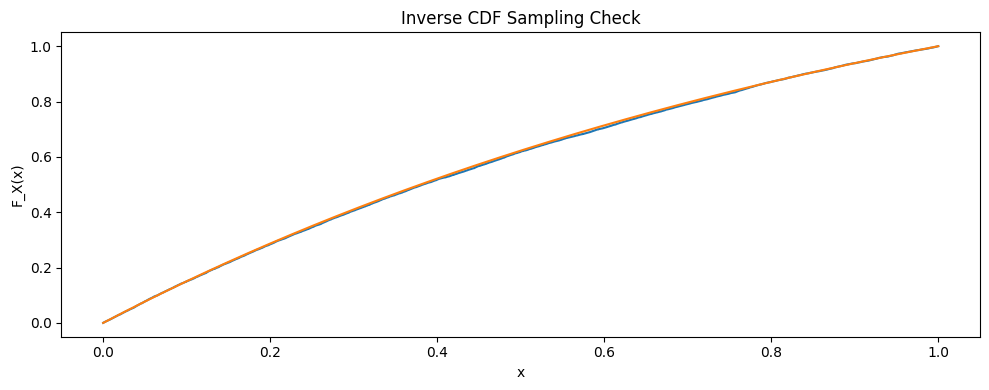

In [5]:
# create synthesis data
y = np.random.rand(10000)
x_syn = -np.log(1 - y / alpha)

# Same as 2.8
# sort data (x-values)
x_sorted = np.sort(x_syn)
n = len(x_sorted)

# empirical CDF (y-values)
y_emp = np.arange(1, n + 1) / n

# modeled CDF (y-values)
y_model = cdf(x_sorted)

# plot
plt.figure(figsize=(10, 4))
plt.plot(x_sorted, y_emp, label="Empirical CDF (synthetic)")
plt.plot(x_sorted, y_model, label="Modeled CDF")
plt.title("Inverse CDF Sampling Check")
plt.xlabel("x")
plt.ylabel("F_X(x)")
plt.tight_layout()
plt.show()

**2.10. Generate synthetic data using the inverse CDF by transforming
uniform samples.** Once you have your inverse CDF, code it up and use it
to create synthetic samples from the last step. To do so, first generate
10,000 samples from the uniform distribution and then feed those uniform
variates through the inverse CDF to generate synthetic variates from our
wait time model. Using those samples, compute the mean and standard
deviation. Present the mean and standard deviation in a table comparing
(a) the empirical values computed from `wait_times.csv`, (b) your
theoretical model values calculated earlier, and (c) your computed
values calculated from your synthetic model. How do they compare?

In [6]:
# (a) mean and std in empirical values
mean_emp = np.mean(wt)
std_emp = np.std(wt)

# (b) mean and std in theoretical model
EX = alpha * (1 - 2 / np.e)
EX2 = alpha * (2 - 5 / np.e)
Var = EX2 - EX**2

mean_theory = EX
std_theory = np.sqrt(Var)

# (c) mean and std in synthetic model
mean_syn = np.mean(x_syn)
std_syn = np.std(x_syn)

# compare
table = pd.DataFrame(
    {
        "Source": [
            "Empirical (wait_times.csv)",
            "Theoretical (model)",
            "Synthetic (inverse CDF)",
        ],
        "Mean (days)": [mean_emp, mean_theory, mean_syn],
        "SD (days)": [std_emp, std_theory, std_syn],
        "Mean (hours)": [8 * mean_emp, 8 * mean_theory, 8 * mean_syn],
        "SD (hours)": [8 * std_emp, 8 * std_theory, 8 * std_syn],
    }
)

table

,Source,Mean (days),SD (days),Mean (hours),SD (hours)
0,Empirical (wait_times.csv),0.404196,0.285566,3.233570,2.284530
1,Theoretical (model),0.418023,0.281649,3.344186,2.253196
2,Synthetic (inverse CDF),0.421403,0.282534,3.371222,2.260273


**2.11. Run a statistical test to evaluate the goodness of fit of your
model to the empirical data from `wait_times.csv`.** To evaluate the
goodness of fit of the model to the data, one tool is the
Kolmogorov–Smirnov test, or simply the KS test. The two-sample version
of this test evaluates the maximum distance between two CDFs, each
calculated from samples of data. In this case, the null hypothesis
states that the samples are drawn from the same distribution. We can
conclude that the sample data are well-represented by the reference
distribution if we do NOT reject the null hypothesis. If we test at the
5% significant level, then we can conclude that data come from the same
distribution if the p-value is greater than 0.05 (we fail to reject the
null hypothesis).

Compare the sample of data from `wait_times.csv` to the synthetic sample
from the model distribution and run the KS test. Also compare the sample
data to the uniform distributed data you generated before transforming
it into the synthetic samples. For the test use
[`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html).

In [11]:
from scipy.stats import kstest

# (1) Compare wait_time to synthetic sample
ks_stat_syn, p_value_syn = kstest(wt, x_syn)

print("(1) Compare wait_time to synthetic sample")
print("KS test: Empirical vs Synthetic")
print(f"KS statistic = {ks_stat_syn:.4f}")
print(f"p-value = {p_value_syn:.4f}\n")

# (2) Compare wait_time to uniform distributed data
ks_stat_uni, p_value_uni = kstest(wt, y)

print("(2) Compare wait_time to uniform distributed data")
print("KS test: Empirical vs Uniform")
print(f"KS statistic = {ks_stat_uni:.4f}")
print(f"p-value = {p_value_uni:.4f}\n")

# (3) Explain
print("(3) Explain")
print(
"From the first comparison, the p-value exceeds 0.05 when the wait time data are compared with the synthetic data, indicating that we fail to"
)
print(
"reject the null hypothesis. In contrast, the p-value from the second comparison is below 0.05, leading us to reject the null hypothesis."
)

(1) Compare wait_time to synthetic sample
KS test: Empirical vs Synthetic
KS statistic = 0.0712
p-value = 0.2612

(2) Compare wait_time to uniform distributed data
KS test: Empirical vs Uniform
KS statistic = 0.1725
p-value = 0.0000

(3) Explain
From the first comparison, the p-value exceeds 0.05 when the wait time data are compared with the synthetic data, indicating that we fail to
reject the null hypothesis. In contrast, the p-value from the second comparison is below 0.05, leading us to reject the null hypothesis.


### Using the model to understand wait times

**2.12. Computing probabilities.** Having a way of generating synthetic
data can allow us to easily compute probabilities. Compute the
probabilities of the following events using the *synthetic data samples*
that you generated.

1.  Wait time is more than 6 hours
2.  Wait time is less than 1 hour
3.  Wait time is less than one additional hour given the client has
    already been waiting for 3 hours (i.e., the probability of the wait
    time being less than 4 hours if they have already waited for 3
    hours)
4.  Wait time is between 3 and 5 hours
5.  What is the 90th percentile of wait times?
6.  What is the 99th percentile of wait times?



In [12]:
# (1) Wait time is more than 6 hours
print("(1) Wait time is more than 6 hours")
wait_more_6 = np.mean(x_syn > 6 / 8)
print(wait_more_6)

# (2) Wait time is less than 1 hour
print("(2) Wait time is less than 1 hour")
wait_less_1 = np.mean(x_syn < 1 / 8)
print(wait_less_1)

# (3) Wait time is less than one additional hour given the client has already been waiting for 3 hours
print(
    "(3) Wait time is less than one additional hour given the client has already been waiting for 3 hours"
)
wait_cond = np.mean((x_syn < 4 / 8) & (x_syn >= 3 / 8)) / np.mean(x_syn >= 3 / 8)
print(f"{wait_cond:.4f}")

# (4) Wait time is between 3 and 5 hours
print("(4) Wait time is between 3 and 5 hours")
wait_3_5 = np.mean((x_syn < 5 / 8) & (x_syn > 3 / 8))
print(wait_3_5)

# (5) What is the 90th percentile of wait times?
print("(5) What is the 90th percentile of wait times?")
p90_days = np.percentile(x_syn, 90)
p90_hours = 8 * p90_days
print(f"Days: {p90_days:.4f}, Hours: {p90_hours:.4f}")

# (6) What is the 99th percentile of wait times?
print("(6) What is the 99th percentile of wait times?")
p99_days = np.percentile(x_syn, 99)
p99_hours = 8 * p99_days
print(f"Days: {p99_days:.4f}, Hours: {p99_hours:.4f}")

(1) Wait time is more than 6 hours
0.1708
(2) Wait time is less than 1 hour
0.184
(3) Wait time is less than one additional hour given the client has already been waiting for 3 hours
0.2500
(4) Wait time is between 3 and 5 hours
0.2374
(5) What is the 90th percentile of wait times?
Days: 0.8405, Hours: 6.7241
(6) What is the 99th percentile of wait times?
Days: 0.9841, Hours: 7.8725


## Exercise 3 - Linear Algebra Operations and Theory

**3.1. Matrix manipulations and multiplication**. Machine learning
involves working with many matrices and understanding what their
products represent, so this exercise will provide you with the
opportunity to practice those skills.

Let $\mathbf{A} =  \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}$, $\mathbf{b} =  \begin{bmatrix}
-1  \\
1
\end{bmatrix}$, $\mathbf{c} =  \begin{bmatrix}
1  \\
2
\end{bmatrix}$

Compute the following **by hand** or indicate that it cannot be
computed. For any cases where an operation is invalid and cannot be
computed, explain why it is invalid.

1.  $\mathbf{A}\mathbf{A}$
2.  $\mathbf{A}\mathbf{A}^{\top}$
3.  $\mathbf{A}\mathbf{b}$
4.  $\mathbf{A}\mathbf{b}^{\top}$
5.  $\mathbf{b}\mathbf{A}$
6.  $\mathbf{b}^{\top}\mathbf{A}$
7.  $\mathbf{b}\mathbf{b}$
8.  $\mathbf{b}^{\top}\mathbf{b}$
9.  $\mathbf{b}\mathbf{b}^{\top}$
10. $\mathbf{A}\circ\mathbf{A}$
11. $\mathbf{b}\circ\mathbf{c}$
12. $\mathbf{b}^{\top}\mathbf{b}^{\top}$
13. $\mathbf{b} + \mathbf{c}^{\top}$
14. $\mathbf{A}^{-1}\mathbf{b}$
15. $\mathbf{b}^{{\top}}\mathbf{A}\mathbf{b}$
16. $\mathbf{b}\mathbf{A}\mathbf{b}^{{\top}}$

*Note: The element-wise (or Hadamard) product is the product of each
element in one matrix with the corresponding element in another matrix,
and is represented by the symbol “$\circ$”.*

![3.1-1.png](./3.1-1.png)
![3.1-2.png](./3.1-2.png)
![3.1-3.png](./3.1-3.png)

**3.2. Matrix manipulations and multiplication using Python**. Repeat
3.1, but this time using Python. If you are using a vector, make sure
the dimensions of the vector match what you’d expect, for example,
matrix $\mathbf{b}$ is a $[2 \times 1]$ vector. In NumPy, unless you’re
specify, you’ll like create a one-dimensional array of length 2 rather
than a $[2 \times 1]$ vector if you don’t specify - be careful of this
potential pitfall. Refer to NumPy’s tools for handling matrices. There
may be circumstances when Python **will** produce an output, but based
on the dimensions of the matrices involved, the linear algebra operation
is not possible. ***Note these cases and explain why they occur***.
Please provide both the Python code AND the output of that code showing
your result. If the output is an error, comment out the code and note
that it cannot be computed.

Be sure to use the right operator for each operation: Matrix
multiplication: `@`; Element-wise multication: `*`. For this exercise,
**only** use one of those to operators for matrix or vector
multiplication.

In [19]:
import numpy as np

# Define basic A, b, and c
A = np.array([[1, 2], [3, 4]])
b = np.array([[-1], [1]])
c = np.array([[1], [2]])

# Matrix multiplication
q1 = A @ A
q2 = A @ A.T
q3 = A @ b

# q4 = A @ b.T
# ERROR: (2x2) @ (1x2) is not valid; inner dimensions do not match (2 != 1)

# q5 = b @ A
# ERROR: (2x1) @ (2x2) is not valid; inner dimensions do not match (1 != 2)

q6 = b.T @ A

# q7 = b @ b
# ERROR: (2x1) @ (2x1) is not valid; inner dimensions do not match

q8 = b.T @ b
q9 = b @ b.T

# Element-wise multiplication
q10 = A * A
q11 = b * c

# q12 = b.T @ b.T
# ERROR: (1x2) @ (1x2) is not valid; inner dimensions do not match

q13 = b + c.T
q14 = np.linalg.inv(A) @ b
q15 = b.T @ A @ b

# q16 = b @ A @ b.T
# ERROR: b @ A is not valid, so the full expression cannot be computed

# Print results
print("q1 =\n", q1)
print("\nq2 =\n", q2)
print("\nq3 =\n", q3)
print("\nq6 =\n", q6)
print("\nq8 =\n", q8)
print("\nq9 =\n", q9)
print("\nq10 =\n", q10)
print("\nq11 =\n", q11)
print("\nq13 =\n", q13)
print("The operation ( b + c.T) is not defined in linear algebra because b is a (2 X 1) vector and c.T is a (1 X 2) vector, so their dimensions \ndo not match. NumPy still returns a result due to broadcasting, where arrays are automatically expanded to a common shape and \nadded element-wise, even though this has no linear algebra interpretation.")
print("\nq14 =\n", q14)
print("\nq15 =\n", q15)

q1 =
 [[ 7 10]
 [15 22]]

q2 =
 [[ 5 11]
 [11 25]]

q3 =
 [[1]
 [1]]

q6 =
 [[2 2]]

q8 =
 [[2]]

q9 =
 [[ 1 -1]
 [-1  1]]

q10 =
 [[ 1  4]
 [ 9 16]]

q11 =
 [[-1]
 [ 2]]

q13 =
 [[0 1]
 [2 3]]
The operation ( b + c.T) is not defined in linear algebra because b is a (2 X 1) vector and c.T is a (1 X 2) vector, so their dimensions 
do not match. NumPy still returns a result due to broadcasting, where arrays are automatically expanded to a common shape and 
added element-wise, even though this has no linear algebra interpretation.

q14 =
 [[ 3.]
 [-2.]]

q15 =
 [[0]]


**3.3. Vector Norms.** Norms are the effective lengths of vectors. For
example, the Euclidean norm, or $L_2$ norm (denoted as
$||\mathbf{\cdot}||_2$), is the most common of several types of norms.
The $L_2$ norm can be calculated for a vector
$$\mathbf{x} =  \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$
as follows:
$$||\mathbf{x}||_2 = \sqrt{\displaystyle \sum_{k=1}^n x_k^2} = \sqrt{\mathbf{x}^{\top}\mathbf{x}}$$

What is the $L_2$ norm of vectors
$\mathbf{d}_1 =  \begin{bmatrix} 2^{-1/2} \\ -2^{-1/2} \\ 0 \end{bmatrix}$
and $\mathbf{d}_2 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$?

![3-3.png](./3.3.png)

**3.4. Orthogonality and unit vectors.** Orthogonal vectors are
frequently used in machine learning in topics such as Principal
Components Analysis and feature engineering for creating decorrelated
features. Knowing what an orthogonal or orthonomal basis is for a space
is an important concept. Find all values of unit vectors,
$\mathbf{d}_3$, that complete an orthonormal basis in a
three-dimensional Euclidean space along with the two vectors:
$\mathbf{d}_1 =  \begin{bmatrix} 2^{-1/2} \\ -2^{-1/2} \\ 0 \end{bmatrix}$
and $\mathbf{d}_2 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$.

For review, vector $\mathbf{x}_1$ is orthonormal to vector
$\mathbf{x}_2$ if (a) $\mathbf{x}_1$ is orthogonal to vector
$\mathbf{x}_2$ AND $\mathbf{x}_1$ is a unit vector. Orthogonal vectors
are perpendicular, which implies that their inner product is zero. A
unit vector is of length 1 (meaning its $L_2$ norm is 1).

![3.4.png](./3-4.png)

**3.5. Eigenvectors and eigenvalues**. Eigenvectors and eigenvalues are
useful for numerous machine learning algorithms, but the concepts take
time to solidly grasp. They are used extensively in machine learning
including in Principal Components Analysis (PCA) and clustering
algorithms. For an intuitive review of these concepts, explore this
[interactive website at
Setosa.io](http://setosa.io/ev/eigenvectors-and-eigenvalues/). Also, the
series of linear algebra videos by Grant Sanderson of 3Brown1Blue are
excellent and can be viewed on youtube
[here](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).
For these questions, numpy may once again be helpful.

1.  In Python, calculate the eigenvalues and corresponding eigenvectors
    of matrix $\mathbf{B}=  \begin{bmatrix}
    1 & 2 & 3 \\
    2 & 4 & 5 \\
    3 & 5 & 6
    \end{bmatrix}$
2.  Choose one of the eigenvector/eigenvalue pairs, $\mathbf{v}$ and
    $\lambda$, and show that
    $\mathbf{B} \mathbf{v} = \lambda \mathbf{v}$. This relationship
    extends to higher orders:
    $\mathbf{B} \mathbf{B} \mathbf{v} = \lambda^2 \mathbf{v}$
3.  Show that the eigenvectors are orthogonal to one another (e.g. their
    inner product is zero - just compute the inner product and show it
    is approximately 0). This is true for eigenvectors from real,
    symmetric matrices. In three dimensions or less, this means that the
    eigenvectors are perpendicular to each other. Typically we use the
    orthogonal basis of our standard x, y, and z, Cartesian coordinates,
    which allows us, if we combine them linearly, to represent any point
    in a 3D space. But any three orthogonal vectors can do the same.
    This property is used, for example, in PCA to identify the
    dimensions of greatest variation.



In [20]:
# Define matrix
B = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])

# (1) Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(B)
print("(1) Calculate eigenvalues and eigenvectors")
print(f"Eigenvalues:{eigenvalues}, \nEigenvectors:\n{eigenvectors}\n")

# (2) Show relationship
v = eigenvectors[:, 0]
lam = eigenvalues[0]
print("(2) Show relationship")
print(f"Bv=lambdav: {B@v} = {lam*v}")
print(f"BBv=lambda^2v: {B@B@v} = {lam*lam*v}\n")

# (3) Show eigenvectors are orthogonal to one another
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
v3 = eigenvectors[:, 2]

print("(3) Show eigenvectors are orthogonal to one another")
print(f"v1@v2: {np.dot(v1,v2):.4f}")
print(f"v1@v3: {np.dot(v1,v3):.4f}")
print(f"v2@v3: {np.dot(v2,v3):.4f}")

(1) Calculate eigenvalues and eigenvectors
Eigenvalues:[11.34481428 -0.51572947  0.17091519], 
Eigenvectors:
[[-0.32798528 -0.73697623  0.59100905]
 [-0.59100905 -0.32798528 -0.73697623]
 [-0.73697623  0.59100905  0.32798528]]

(2) Show relationship
Bv=lambdav: [-3.72093206 -6.70488789 -8.36085845] = [-3.72093206 -6.70488789 -8.36085845]
BBv=lambda^2v: [-42.2132832  -76.06570795 -94.85238636] = [-42.2132832  -76.06570795 -94.85238636]

(3) Show eigenvectors are orthogonal to one another
v1@v2: -0.0000
v1@v3: -0.0000
v2@v3: -0.0000


## Exercise 4 - Numerical Programming with Data

**Loading data and gathering insights from a real dataset.** In data
science, we often need to have a sense of the idiosyncrasies of the
data, how they relate to the questions we are trying to answer, and to
use that information to help us to determine what approach, such as
machine learning, we may need to apply to achieve our goal. This
exercise provides practice in exploring a dataset and answering question
that might arise from applications related to the data.

**Your objective**. For this dataset, your goal is to answer the
questions below about electricity generation in the United States.

**Data**. The data for this problem can be found in the `data\a1\`
subfolder in the `notebooks` folder on
[github](https://github.com/kylebradbury/ids705). The filename is
`egrid2016.xlsx`. This dataset is the Environmental Protection Agency’s
(EPA) [Emissions & Generation Resource Integrated Database
(eGRID)](https://www.epa.gov/energy/emissions-generation-resource-integrated-database-egrid)
containing information about all power plants in the United States, the
amount of generation they produce, what fuel they use, the location of
the plant, and many more quantities. We’ll be using a subset of those
data.

The fields we’ll be using include:

| field    | description                                      |
|:---------|:-------------------------------------------------|
| SEQPLT16 | eGRID2016 Plant file sequence number (the index) |
| PSTATABB | Plant state abbreviation                         |
| PNAME    | Plant name                                       |
| LAT      | Plant latitude                                   |
| LON      | Plant longitude                                  |
| PLPRMFL  | Plant primary fuel                               |
| CAPFAC   | Plant capacity factor                            |
| NAMEPCAP | Plant nameplate capacity (Megawatts MW)          |
| PLNGENAN | Plant annual net generation (Megawatt-hours MWh) |
| PLCO2EQA | Plant annual CO2 equivalent emissions (tons)     |

For more details on the data, you can refer to the [eGrid technical
documents](https://www.epa.gov/sites/default/files/2020-01/documents/egrid2018_technical_support_document.pdf).
For example, you may want to review page 51 and the section “Plant
Primary Fuel (PLPRMFL)”, which gives the full names of the fuel types
including WND for wind, NG for natural gas, BIT for Bituminous coal,
etc.

There also are a couple of “gotchas” to watch out for with this dataset:

-   The headers are on the second row and you’ll want to ignore the
    first row (they’re more detailed descriptions of the headers).
-   NaN values represent blanks in the data. These will appear regularly
    in real-world data, so getting experience working with these sorts
    of missing values will be important.

Questions to answer:

**4.1.** Which power plant generated the most energy in 2016 (measured
in MWh)?

In [24]:
# read and clean files
egrid2016 = pd.read_excel("egrid2016.xlsx", header=1)

# question 4.1
energy_max_row = egrid2016.loc[egrid2016["PLNGENAN"].idxmax()]
plant_max_energy = energy_max_row["PNAME"]
print(f"{plant_max_energy} generated the most energy in 2016.")

Palo Verde generated the most energy in 2016.


**4.2.** Which power plant produced the most CO2 emissions (measured in
tons)?


In [25]:
# question 4.2
co2_max_row = egrid2016.loc[egrid2016["PLCO2EQA"].idxmax()]
plant_max_co2 = co2_max_row["PNAME"]
print(f"{plant_max_co2} produced the most CO2 emissions.")

James H Miller Jr produced the most CO2 emissions.


**4.3.** What is the primary fuel of the plant with the most CO2
emissions?

In [26]:
# question 4.3
fuel_max_co2 = co2_max_row["PLPRMFL"]
print(f"The primary fuel of te plant with the most CO2 emissions is {fuel_max_co2}.")

The primary fuel of te plant with the most CO2 emissions is SUB.


**4.4.** What is the name of the northern-most power plant in the United
States?

In [27]:
# question 4.4
north_row = egrid2016.loc[egrid2016["LAT"].idxmax()]
plant_most_north = north_row["PNAME"]
print(f"The northen-most power plant is {plant_most_north}")

The northen-most power plant is Barrow


**4.5.** What is the state where the northern-most power plant in the
United States is located?


In [26]:
# question 4.5
state_most_north = north_row["PSTATABB"]
print(f"The state of the northen-most power plant is {state_most_north}")

The state of the northen-most power plant is AK


**4.6.** Plot a bar plot showing the amount of energy produced by each
fuel type across all plants.

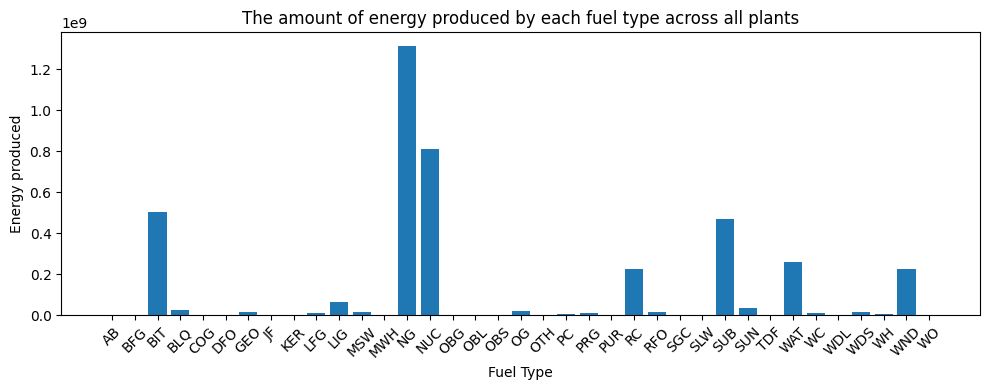

In [28]:
# question 4.6

# check how many types of fuel before grouping
egrid2016["PLPRMFL"].value_counts().nunique()

# prepare data
fuel_energy = egrid2016.groupby("PLPRMFL")["PLNGENAN"].sum()

# make plots
plt.figure(figsize=(10, 4))
plt.bar(fuel_energy.index, fuel_energy.values)
plt.xticks(rotation=45)
plt.xlabel("Fuel Type")
plt.ylabel("Energy produced")
plt.title("The amount of energy produced by each fuel type across all plants")

plt.tight_layout()
plt.show()

**4.7.** From the plot in (D), which fuel for generation produces the
most energy (MWh) in the United States?

In [31]:
# question 4.7
most_energy_fuel = fuel_energy.idxmax()
print(f"{most_energy_fuel} produces the most energy in the US.")

NG produces the most energy in the US.


**4.8.** Which state has the largest number of hydroelectric plants? In
this case, each power plant counts once so regardless of how large the
power plant is, we want to determine which state has the most of them.
Note the primary fuel for hydroelectric plants is listed as water in the
documentation.

In [32]:
# question 4.8
hydro = egrid2016[egrid2016["PLPRMFL"] == "WAT"]
hydro_by_state = hydro.groupby("PSTATABB").agg(num_hydro_plants=("PNAME", "count"))
largest_hydro_state = hydro_by_state["num_hydro_plants"].idxmax()
print(f"{largest_hydro_state} has the largetst number of hydroelectric plants.")

CA has the largetst number of hydroelectric plants.


**4.9.** Which state has generated the most energy (MWh) using coal? You
may also want to explore the documentation for the `isin()` method for
pandas. Note: in the eGrid documentation, there are multiple types of
coal listed; be sure to factor in each type of coal.

In [33]:
# question 4.9
# Select row that using coal
coal_fuels = ["BIT", "LIG", "RC", "SUB", "WC"]
coal = egrid2016[egrid2016["PLPRMFL"].isin(coal_fuels)]

# Check state
state_using_coal = coal.groupby("PSTATABB").agg(energy_sum=("PLNGENAN", "sum"))
state_using_most_coal = state_using_coal["energy_sum"].idxmax()

print(f"{state_using_most_coal} has generated the most energy using coal.")

TX has generated the most energy using coal.


**4.10.** Which primary fuel produced the *most* CO2 emissions in the
United States? We would like to compare natural gas, coal, oil, and
renewables but the current categories are much more specific than that.
As a first step, group the data as shown below, replacing the existing
labels with the replacements suggested. For example, BIT and LIG should
be replaced with COAL.

-   COAL = BIT, LIG, RC, SUB, WC
-   OIL = DFO, JF, KER, RFO, WO
-   GAS = BFG, COG, LFG, NG, OG, PG, PRG
-   RENEW = GEO, SUN, WAT, WDL, WDS, WND

You may want to create a function that does this replacement prior to
running your code. You can check whether or not it was successful by
verifying that each of the values that should be replaced has been
replaced - check that before moving on with the question.

You will want to use ‘PLCO2EQA’ to answer this question as it’s the
quantity of emissions each plant generates.



In [34]:
# question 4.10

# define fuel replacement map
fuel_map = {
    # COAL
    "BIT": "COAL",
    "LIG": "COAL",
    "RC": "COAL",
    "SUB": "COAL",
    "WC": "COAL",
    # OIL
    "DFO": "OIL",
    "JF": "OIL",
    "KER": "OIL",
    "RFO": "OIL",
    "WO": "OIL",
    # GAS
    "BFG": "GAS",
    "COG": "GAS",
    "LFG": "GAS",
    "NG": "GAS",
    "OG": "GAS",
    "PG": "GAS",
    "PRG": "GAS",
    # RENEWABLE
    "GEO": "RENEWABLE",
    "SUN": "RENEWABLE",
    "WAT": "RENEWABLE",
    "WDL": "RENEWABLE",
    "WDS": "RENEWABLE",
    "WND": "RENEWABLE",
}

# replace values
egrid2016["fuel_group"] = egrid2016["PLPRMFL"].map(fuel_map)

# group fuel groups to sum co2
fuel_group_co2 = egrid2016.groupby("fuel_group").agg(sum_of_co2=("PLCO2EQA", "sum"))
most_co2_fuel = fuel_group_co2["sum_of_co2"].idxmax()

print(f"{most_co2_fuel} produced the most CO2 emissions in the United States.")

COAL produced the most CO2 emissions in the United States.


## Appendix: Definitions and identities

The symbology in this assignment conforms to the following convention:

| Symbol Example | Meaning | Possible variations |
|--------------------------|-----------------------|-----------------------|
| $X$ | A random variable | Upper case, non-bolded letter |
| $\bar{X}$ | The complement of a random variable | Upper case, non-bolded letter with bar |
| $\mathbf{x}$ | Vector ($N \times 1$) | Lower case, bolded letters/symbols |
| $\mathbf{X}$ | Matrix ($N \times M$) | Upper case, bolded letters/symbols |
| $P(\cdot)$ | Probability of the event within the parenthesis | Parenthesis may include one event or more events |
| $A \cap B$ | Intersection of $A$ and $B$, that is the case of events $A$ and $B$ occurring simultaneously | Two random variables represented by upper case unbolded letters |

Below is a list of potentially helpful identities and equations for
reference.

| Identities and equations | Description |
|--------------------------------------|----------------------------------|
| $E_X[X] = \displaystyle \int_{-\infty}^{\infty} x f_X(x) dx$ | Expected value of continuous random variable $X$ |
| $Var_X(X) = E_X[X^2]-E_X[X]^2$ | Variance of random variable $X$ |
| $\sigma_X(X) = \sqrt{Var_X(X)}$ | Standard deviation of $X$ as a function of variance |
| $\displaystyle P( X \vert Y)= \frac{P(X \cap Y)}{P(Y)}$ | Conditional probability of event $X$ given event $Y$ has occurred |
| $\displaystyle P(Y \vert X)= \frac{P(X \vert Y)P(Y)}{P(X)}$ | Bayes’ Rule |
| $\displaystyle F_X(x) = \int_{-\infty}^{x} f_X(x) dx$ | CDF as a function of PDF |
| $\displaystyle f_X(x) = \frac{dF_X(x)}{dx}$ | PDF as a function of CDF |
| $P(X \leq x) = F_X(x)$ | Probabilistic definition of the CDF |
| $P(a < X \leq b) = F_X(b) - F_X(a)$ | Probability the $X$ lies between $a$ and $b$ |
| $P(A) + P(\bar{A}) = 1$ | The sum of the probability of an event and its complement is 1 |
| $\displaystyle P(Y) = P(Y \vert X)P(X) + P(Y  \vert \bar{X})P(\bar{X})$ | Law of Total Probability |
| $\displaystyle \int e^{-x} dx = -e^{-x}$ | Indefinite integral |
| $\displaystyle \int x e^{-x} dx = -e^{-x}(x+1)$ | Indefinite integral |
| $\displaystyle \int x^2 e^{-x} dx = -e^{-x}(x^2+2x+2)$ | Indefinite integral |
| $\displaystyle \begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1} = \frac{1}{ad-cb} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$ | $2 \times 2$ matrix inversion formula |